In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from IPython.core.pylabtools import figsize
figsize(14, 7)
import seaborn; seaborn.set()


Project Stage - III (Basic Machine Learning)
Goals

The goal of Stage II is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.
Tasks:
Task 1: (70 pts)

    Team: (30)
        Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.
            Start your data from the first day of infections in US. X-Axis - number of days since the first case, Y-Axis - number of new cases and deaths.
            Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). Discuss bias versus variance tradeoff.
            Plot trend line along for the data along with the forecast of 1 week ahead.
            Describe the trends as compared to other countries.
    Member: (40 pts)
        Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties (top 5 with highest number of cases). Start your data from the first day of infections.
            X-Axis - number of days since the first case, Y - Axis number of new cases and deaths. Calcluate error using RMSE.
            Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends.
            Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
                Perform hypothesis tests on questions identified in Stage II
            e.x. Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.
            Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing.

Task 2: (30 pts)

    Member:
        For each of the aforemention analysis plot graphs,
            trend line
            confidence intervals (error in prediction)
            prediction path (forecast)

Deliverable

    Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository.
    Presentation recordings on canvas.

Deadline: 04/18/2021


In [4]:
#get Texas cases data and prep it
TexasCWF = pd.read_csv("TexasCWF.csv")
TXWC = TexasCWF.T.drop(['countyFIPS', 'StateFIPS','population'])
TXWC['counter'] = range(len(TXWC))
TXWC = TXWC.reset_index().set_index('counter')
TXWC = TXWC.drop(['index'], axis=1)
TXZC = TXWC[0]

In [5]:
#get Texas deaths data and prep it
TexasDWF = pd.read_csv("TexasDWF.csv")
TXWD = TexasDWF.T.drop(['countyFIPS', 'StateFIPS','population'])
TXWD['counter'] = range(len(TXWD))
TXWD = TXWD.reset_index().set_index('counter')
TXWD = TXWD.drop(['index'], axis=1)
TXZD = TXWD[0]

In [6]:
#function to model and plot linear reggression, with predictions included, and calcualte and print RSME
def modeling(dataset):
    #set appropriate x and y from data frame, index and cases
    temp_x = np.array(dataset.index, dtype=float)
    Y = np.array(dataset, dtype=float)
    #make x fit intercept
    X = sm.add_constant(temp_x)
    polynomial_features= PolynomialFeatures(degree=1)
    replace_x = polynomial_features.fit_transform(X)
    model = sm.OLS(Y, replace_x).fit()
    #predictions projections are made and added on to the original model and plotted
    prediction = model.predict()
    plt.scatter(x=dataset.index, y=dataset, c='b')
    plt.plot(temp_x, prediction, color = 'g')
    plt.show()
    print("root mean square error is " + str(rmse(Y, prediction)))
    return

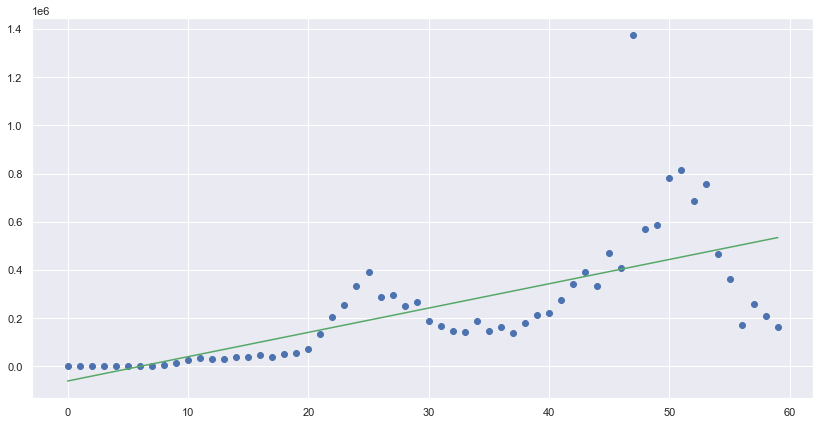

root mean square error is 186433.85665727936
None


In [7]:
print(modeling(TXZC))

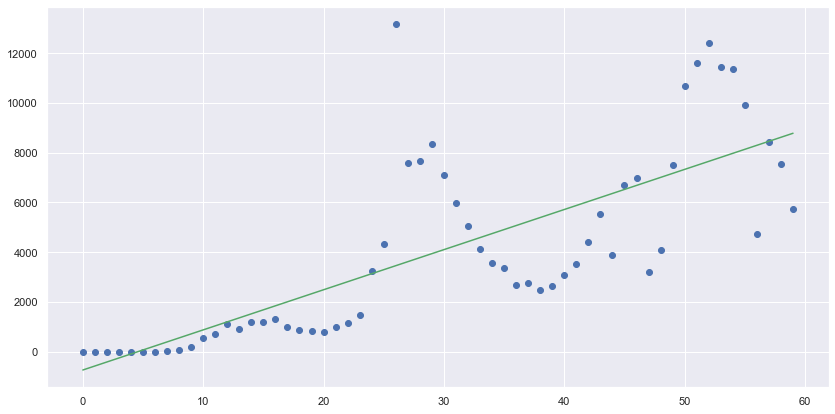

root mean square error is 2431.3401441587985
None


In [8]:
print(modeling(TXZD))

## Top 5 counties deaths Texas

In [9]:
#Texas deaths for one of top counties prepare data
TexasDeaths = pd.read_csv("TexasDeaths.csv")
TexasDeaths = TexasDeaths.rename(columns = {'Unnamed: 0': 'FPS'}, inplace = False)

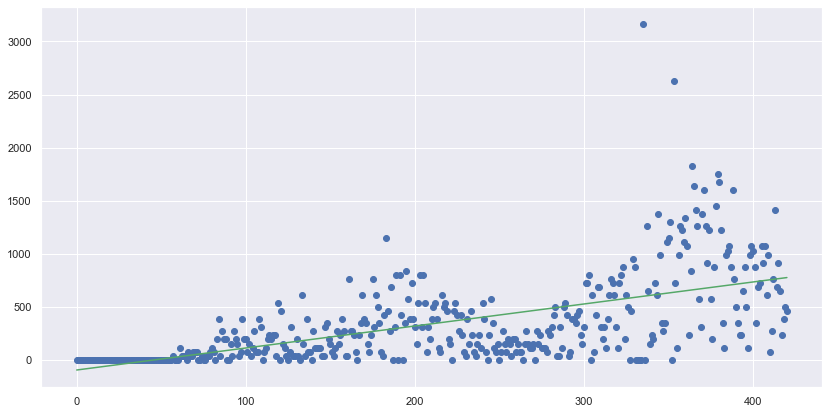

root mean square error is [603.287146   601.7902396  600.29677234 598.80676993 597.32025832
 595.83726363 594.35781219 592.88193051 591.40964533 589.94098357
 588.47597236 587.01463904 585.55701113 584.10311638 582.65298274
 581.20663835 579.76411158 578.325431   576.89062537 575.45972369
 574.03275515 572.60974915 571.19073531 569.77574345 568.36480362
 566.95794607 565.55520126 564.15659986 562.76217278 561.37195112
 559.9859662  558.60424955 557.22683293 555.8537483  554.48502785
 553.12070398 551.76080929 550.40537662 549.05443901 547.70802973
 546.36618225 545.02893026 543.69630768 542.36834863 541.04508744
 539.72655867 538.4127971  537.10383769 535.79971565 534.50046638
 533.20612551 531.91672886 530.63231248 529.35291261 528.07856573
 526.8093085  525.5451778  524.2862107  523.0324445  521.78391669
 520.54066495 519.3027272  518.0701415  516.84294617 515.62117969
 514.40488073 513.19408818 511.9888411  510.78917874 509.59514055
 508.40676616 507.22409536 506.04716816 504.876024

In [10]:
#pull one of the top counties
df2623=TexasDeaths.loc[TexasDeaths['FPS'] == 2623]
df2623 = df2623.T.iloc[1:]
df2623['counter'] = range(len(df2623))
df2623 = df2623.reset_index().set_index('counter')
df2623 = df2623.drop(['index'], axis=1)
print(modeling(df2623))

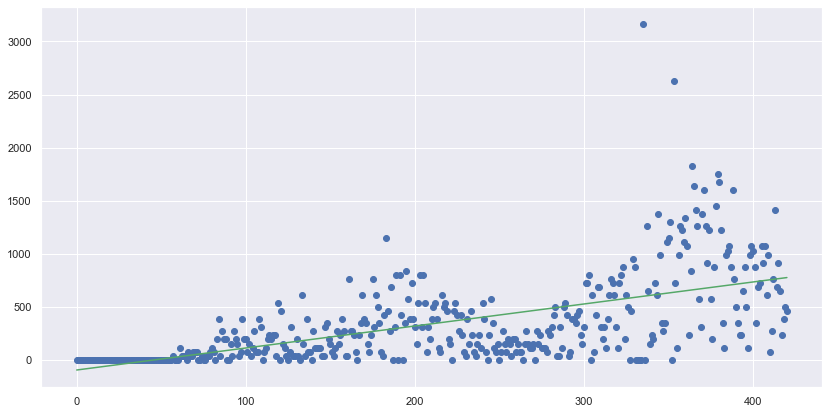

root mean square error is [603.287146   601.7902396  600.29677234 598.80676993 597.32025832
 595.83726363 594.35781219 592.88193051 591.40964533 589.94098357
 588.47597236 587.01463904 585.55701113 584.10311638 582.65298274
 581.20663835 579.76411158 578.325431   576.89062537 575.45972369
 574.03275515 572.60974915 571.19073531 569.77574345 568.36480362
 566.95794607 565.55520126 564.15659986 562.76217278 561.37195112
 559.9859662  558.60424955 557.22683293 555.8537483  554.48502785
 553.12070398 551.76080929 550.40537662 549.05443901 547.70802973
 546.36618225 545.02893026 543.69630768 542.36834863 541.04508744
 539.72655867 538.4127971  537.10383769 535.79971565 534.50046638
 533.20612551 531.91672886 530.63231248 529.35291261 528.07856573
 526.8093085  525.5451778  524.2862107  523.0324445  521.78391669
 520.54066495 519.3027272  518.0701415  516.84294617 515.62117969
 514.40488073 513.19408818 511.9888411  510.78917874 509.59514055
 508.40676616 507.22409536 506.04716816 504.876024

In [11]:
#Texas deaths for one of top counties prepare data
df2667=TexasDeaths.loc[TexasDeaths['FPS'] == 2667]
df2667 = df2667.T.iloc[1:]
df2667['counter'] = range(len(df2667))
df2667 = df2667.reset_index().set_index('counter')
df2667 = df2667.drop(['index'], axis=1)
print(modeling(df2623))

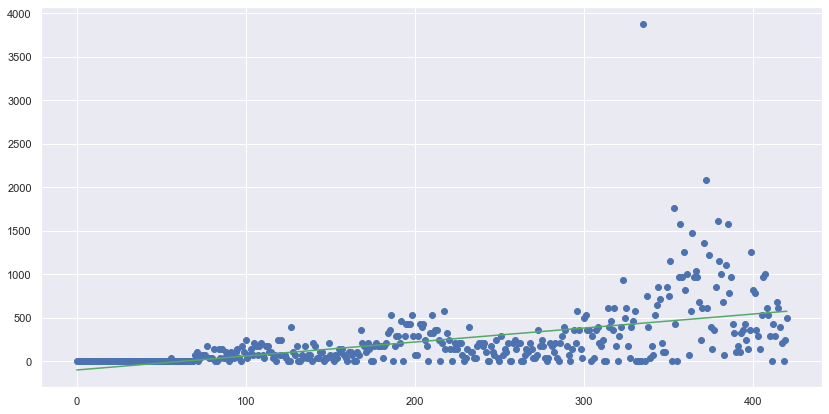

root mean square error is [496.72737515 495.63536289 494.54616907 493.45981233 492.37631147
 491.29568537 490.21795305 489.14313364 488.07124637 487.00231061
 485.93634584 484.87337165 483.81340776 482.75647399 481.70259028
 480.65177671 479.60405345 478.55944079 477.51795916 476.47962908
 475.44447121 474.4125063  473.38375523 472.35823902 471.33597876
 470.3169957  469.30131118 468.28894666 467.27992372 466.27426406
 465.27198948 464.2731219  463.27768337 462.28569603 461.29718216
 460.31216412 459.33066441 458.35270563 457.37831049 456.40750182
 455.44030254 454.47673572 453.5168245  452.56059213 451.60806199
 450.65925756 449.71420242 448.77292025 447.83543484 446.90177008
 445.97194999 445.04599864 444.12394024 443.20579908 442.29159957
 441.38136619 440.47512353 439.57289627 438.6747092  437.78058716
 436.89055513 436.00463816 435.12286137 434.24524998 433.37182931
 432.50262475 431.63766175 430.77696588 429.92056276 429.06847809
 428.22073766 427.37736731 426.53839297 425.703840

In [12]:
#Texas deaths for one of top counties prepare data
df2786=TexasDeaths.loc[TexasDeaths['FPS'] == 2786]
df2786 = df2786.T.iloc[1:]
df2786['counter'] = range(len(df2786))
df2786 = df2786.reset_index().set_index('counter')
df2786 = df2786.drop(['index'], axis=1)
print(modeling(df2786))

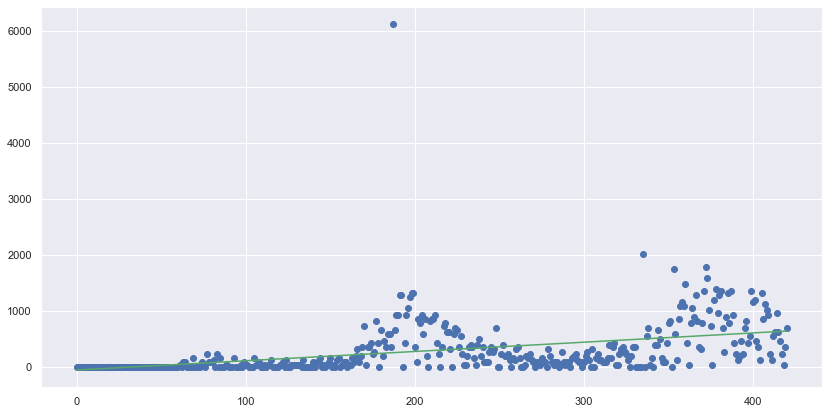

root mean square error is [590.91726793 589.94442952 588.97463934 588.00791246 587.04426402
 586.08370921 585.12626326 584.17194146 583.22075913 582.27273168
 581.32787453 580.38620316 579.44773312 578.51247997 577.58045934
 576.65168692 575.72617841 574.80394959 573.88501627 572.9693943
 572.05709958 571.14814806 570.24255572 569.34033859 568.44151275
 567.5460943  566.65409941 565.76554425 564.88044507 563.99881814
 563.12067975 562.24604627 561.37493407 560.50735957 559.64333921
 558.7828895  557.92602695 557.07276811 556.22312956 555.37712793
 554.53477985 553.696102   552.86111109 552.02982385 551.20225702
 550.3784274  549.55835179 548.74204703 547.92952996 547.12081746
 546.31592643 545.51487377 544.71767644 543.92435137 543.13491554
 542.34938592 541.56777952 540.79011335 540.01640443 539.24666979
 538.48092648 537.71919154 536.96148204 536.20781505 535.45820762
 534.71267684 533.97123978 533.23391352 532.50071513 531.77166168
 531.04677026 530.32605792 529.60954172 528.8972387

In [13]:
#Texas deaths for one of top counties prepare data
df2581=TexasDeaths.loc[TexasDeaths['FPS'] == 2581]
df2581 = df2581.T.iloc[1:]
df2581['counter'] = range(len(df2581))
df2581 = df2581.reset_index().set_index('counter')
df2581 = df2581.drop(['index'], axis=1)
print(modeling(df2581))

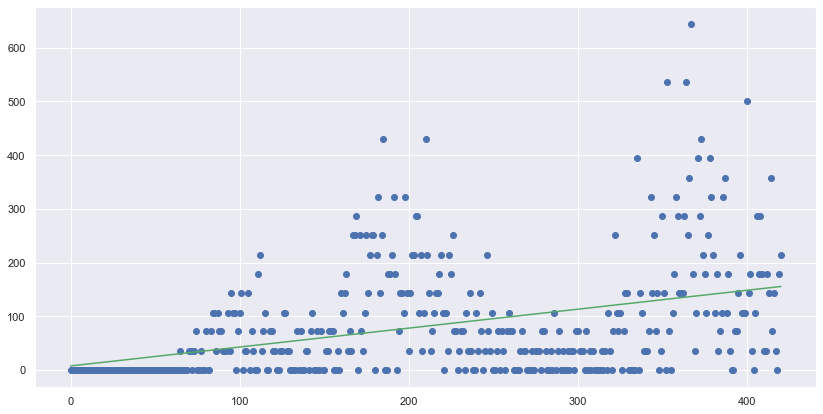

root mean square error is [128.8589892  128.65724424 128.45614768 128.25570257 128.05591198
 127.85677896 127.65830659 127.46049797 127.26335619 127.06688434
 126.87108555 126.67596293 126.48151962 126.28775874 126.09468345
 125.90229691 125.71060226 125.51960269 125.32930137 125.13970149
 124.95080623 124.76261881 124.57514242 124.38838029 124.20233563
 124.01701168 123.83241166 123.64853883 123.46539643 123.28298771
 123.10131594 122.92038439 122.74019632 122.56075503 122.38206378
 122.20412588 122.02694462 121.85052329 121.67486521 121.49997369
 121.32585204 121.15250357 120.97993162 120.80813951 120.63713057
 120.46690814 120.29747556 120.12883616 119.9609933  119.79395032
 119.62771057 119.46227741 119.29765419 119.13384426 118.970851
 118.80867775 118.64732789 118.48680477 118.32711177 118.16825224
 118.01022955 117.85304707 117.69670816 117.54121619 117.38657453
 117.23278654 117.07985559 116.92778503 116.77657823 116.62623855
 116.47676935 116.32817397 116.18045579 116.03361813

In [14]:
#Texas deaths for one of top counties prepare data
df2793=TexasDeaths.loc[TexasDeaths['FPS'] == 2793]
df2793 = df2793.T.iloc[1:]
df2793['counter'] = range(len(df2793))
df2793 = df2793.reset_index().set_index('counter')
df2793 = df2793.drop(['index'], axis=1)
print(modeling(df2793))

## Top 5 counties cases Texas

In [15]:
TexasCases = pd.read_csv("TexasCases.csv")
TexasCases = TexasCases.rename(columns = {'Unnamed: 0': 'FPS'}, inplace = False)

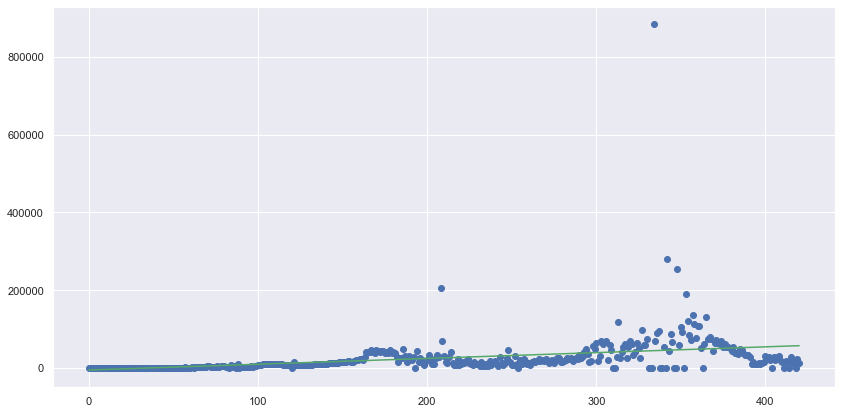

root mean square error is [61452.03005276 61376.38654997 61301.01143965 61225.90571308
 61151.0703628  61076.50638269 61002.21476783 60928.19651454
 60854.45262031 60780.98408374 60707.79190455 60634.87708352
 60562.24062242 60489.88352404 60417.80679206 60346.0114311
 60274.4984466  60203.26884485 60132.32363288 60061.66381845
 59991.29041003 59921.20441671 59851.40684817 59781.89871466
 59712.68102692 59643.75479615 59575.12103397 59506.78075236
 59438.73496361 59370.98468029 59303.53091519 59236.37468126
 59169.51699158 59102.95885928 59036.70129755 58970.74531951
 58905.09193821 58839.74216656 58774.69701728 58709.95750286
 58645.52463548 58581.39942697 58517.58288874 58454.07603177
 58390.87986649 58327.99540278 58265.42364987 58203.1656163
 58141.22230987 58079.59473758 58018.28390556 57957.290819
 57896.61648213 57836.26189812 57776.22806903 57716.51599576
 57657.12667799 57598.06111409 57539.3203011  57480.9052346
 57422.81690874 57365.05631609 57307.62444763 57250.52229264
 57

In [16]:
#Texas cases for one of top counties prepare data
df2623 = TexasCases.loc[TexasCases['FPS'] == 2623]
df2623 = df2623.T.iloc[1:]
df2623['counter'] = range(len(df2623))
df2623 = df2623.reset_index().set_index('counter')
df2623 = df2623.drop(['index'], axis=1)
print(modeling(df2623))

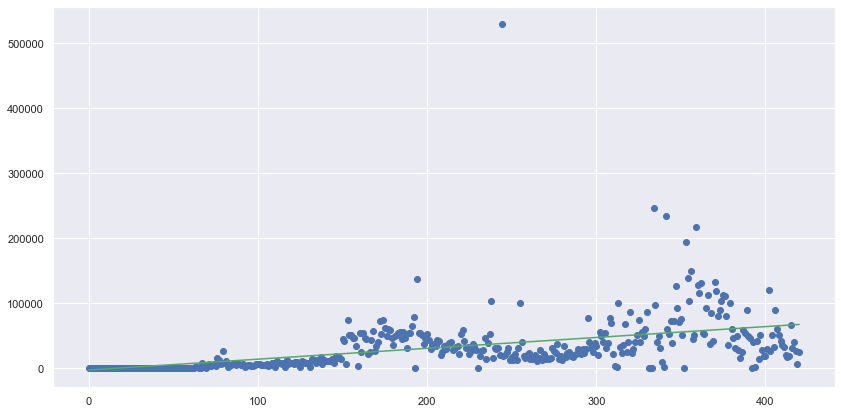

root mean square error is [55347.76679349 55242.23238001 55137.00115803 55032.07486681
 54927.45525386 54823.14407488 54719.14309379 54615.45408265
 54512.0788217  54409.01909927 54306.27671179 54203.85346379
 54101.7511678  53999.97164438 53898.51672206 53797.3882373
 53696.58803447 53596.11796581 53495.97989138 53396.17567903
 53296.70720433 53197.57635058 53098.7850087  53000.33507722
 52902.2284622  52804.46707721 52707.05284327 52609.98768875
 52513.27354936 52416.91236807 52320.90609504 52225.25668758
 52129.96611003 52035.03633376 51940.46933702 51846.26710495
 51752.43162942 51658.96490901 51565.8689489  51473.1457608
 51380.79736286 51288.82577956 51197.23304165 51106.02118605
 51015.19225573 50924.74829964 50834.6913726  50745.02353517
 50655.7468536  50566.86339965 50478.37525054 50390.28448881
 50302.59320218 50215.30348347 50128.41743046 50041.93714577
 49955.86473671 49870.20231517 49784.95199748 49700.1159043
 49615.6961604  49531.69489464 49448.11423969 49364.956332
 49

In [17]:
#Texas cases for one of top counties prepare data
df2667=TexasCases.loc[TexasCases['FPS'] == 2667]
df2667 = df2667.T.iloc[1:]
df2667['counter'] = range(len(df2667))
df2667 = df2667.reset_index().set_index('counter')
df2667 = df2667.drop(['index'], axis=1)
print(modeling(df2667))

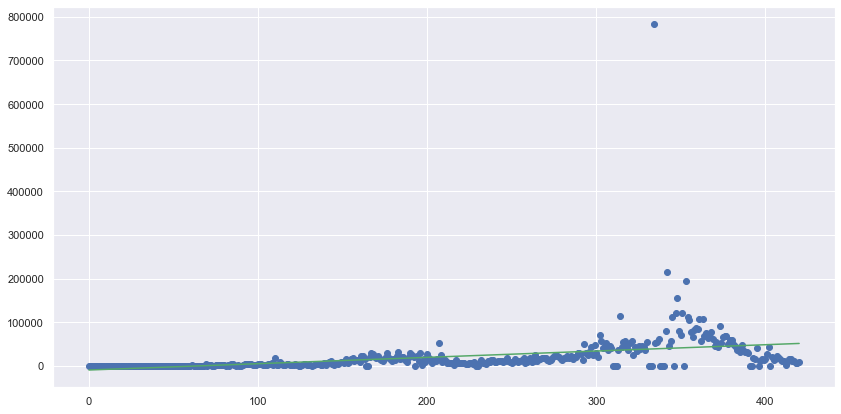

root mean square error is [55446.65811847 55367.28120222 55288.17002718 55209.32573571
 55130.74947283 55052.44238624 54974.40562619 54896.6403455
 54819.14769953 54741.92884609 54664.98494545 54588.31716028
 54511.92665559 54435.81459872 54359.98215927 54284.43050908
 54209.16082215 54134.17427465 54059.4720448  53985.05531288
 53910.92526117 53837.0830739  53763.52993716 53690.26703892
 53617.29556893 53544.61671867 53472.23168133 53400.14165171
 53328.34782619 53256.8514027  53185.6535806  53114.75556067
 53044.15854506 52973.86373718 52903.87234168 52834.1855644
 52764.80461227 52695.73069326 52626.96501634 52558.50879138
 52490.36322912 52422.52954107 52355.00893947 52287.80263722
 52220.91184778 52154.33778515 52088.08166375 52022.14469839
 51956.52810417 51891.23309642 51826.26089063 51761.61270235
 51697.28974715 51633.29324053 51569.62439783 51506.28443415
 51443.27456431 51380.59600272 51318.24996333 51256.23765954
 51194.56030412 51133.21910912 51072.21528581 51011.55004454


In [18]:
#Texas cases for one of top counties prepare data
df2786=TexasCases.loc[TexasCases['FPS'] == 2786]
df2786 = df2786.T.iloc[1:]
df2786['counter'] = range(len(df2786))
df2786 = df2786.reset_index().set_index('counter')
df2786 = df2786.drop(['index'], axis=1)
print(modeling(df2786))

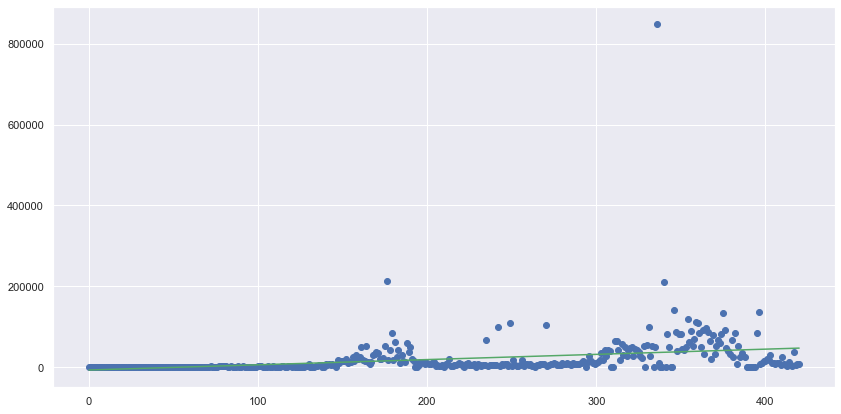

root mean square error is [56879.43689701 56818.22503882 56757.2398172  56696.48196348
 56635.95220941 56575.65128711 56515.57992907 56455.73886808
 56396.12883723 56336.75056988 56277.60479964 56218.6922603
 56160.01368586 56101.56981045 56043.36136833 55985.38909384
 55927.65372139 55870.15598541 55812.89662033 55755.87636054
 55699.09594038 55642.55609408 55586.25755575 55530.20105931
 55474.38733853 55418.8171269  55363.4911577  55308.41016388
 55253.57487807 55198.98603253 55144.64435915 55090.55058934
 55036.70545409 54983.10968386 54929.76400857 54876.66915758
 54823.82585963 54771.23484281 54718.89683455 54666.81256152
 54614.98274966 54563.40812412 54512.08940919 54461.02732831
 54410.22260401 54359.67595786 54309.38811047 54259.35978139
 54209.59168913 54160.08455109 54110.83908353 54061.85600153
 54013.13601892 53964.67984832 53916.48820098 53868.56178687
 53820.90131453 53773.50749109 53726.3810222  53679.52261202
 53632.93296315 53586.6127766  53540.56275172 53494.78358622

In [19]:
#Texas cases for one of top counties prepare data
df2581=TexasCases.loc[TexasCases['FPS'] == 2581]
df2581 = df2581.T.iloc[1:]
df2581['counter'] = range(len(df2581))
df2581 = df2581.reset_index().set_index('counter')
df2581 = df2581.drop(['index'], axis=1)
print(modeling(df2581))

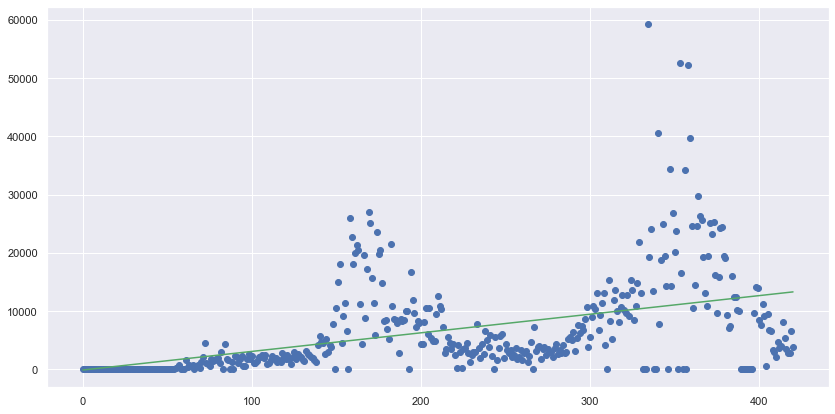

root mean square error is [10745.19099028 10725.30058895 10705.46843841 10685.694863
 10665.98018848 10646.32474208 10626.72885245 10607.19284965
 10587.71706521 10568.30183202 10548.94748444 10529.65435819
 10510.42279041 10491.25311963 10472.14568576 10453.10083011
 10434.11889532 10415.20022543 10396.34516581 10377.55406318
 10358.82726561 10340.16512247 10321.56798446 10303.03620359
 10284.57013317 10266.17012777 10247.83654326 10229.56973676
 10211.37006664 10193.23789251 10175.1735752  10157.17747676
 10139.24996043 10121.39139064 10103.60213299 10085.88255424
 10068.23302227 10050.6539061  10033.14557587 10015.70840279
  9998.34275916  9981.04901833  9963.8275547   9946.67874368
  9929.6029617   9912.60058616  9895.67199544  9878.81756885
  9862.03768664  9845.33272996  9828.70308084  9812.14912217
  9795.67123769  9779.26981195  9762.94523029  9746.69787883
  9730.52814443  9714.43641467  9698.42307782  9682.48852285
  9666.63313933  9650.8573175   9635.16144813  9619.54592262


In [20]:
#Texas cases for one of top counties prepare data
df2793=TexasCases.loc[TexasCases['FPS'] == 2793]
df2793 = df2793.T.iloc[1:]
df2793['counter'] = range(len(df2793))
df2793 = df2793.reset_index().set_index('counter')
df2793 = df2793.drop(['index'], axis=1)
print(modeling(df2793))

# Hospital Bed Data

In [30]:
HospitalBedData = pd.read_csv("../../../../data/stage_I/Definitive_Healthcare _USA_Hospital_Beds.csv")

In [31]:
hospital = HospitalBedData[['HQ_STATE', 'NUM_ICU_BEDS']]
hospital = hospital.loc[hospital['HQ_STATE'] == 'TX']
hospital = hospital.loc[hospital['NUM_ICU_BEDS'].notna()]
usable_beds = hospital['NUM_ICU_BEDS'].sum()

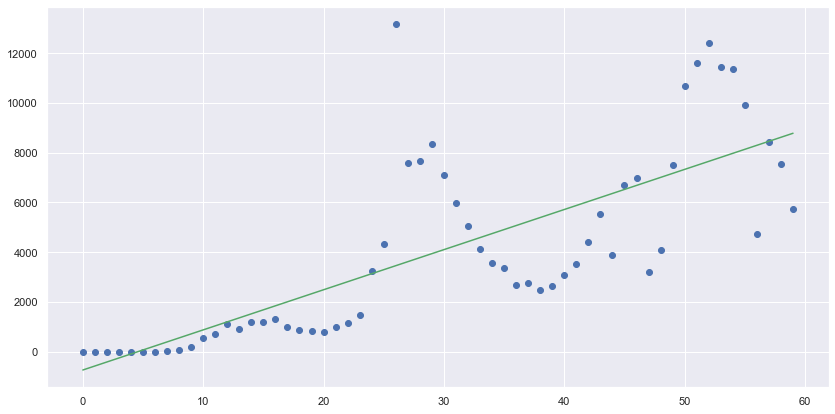

root mean square error is 2431.3401441587985
None


In [32]:
print(modeling(TXZD))
inter = [usable_beds] * 100

### 

## The point of no return can be seen at around 20 Texas, from the calcuated intercept along side the plot









# hypothesis 
## Does a less amount of hosipital beds lead to more cases?
## Does a less amount of hosipital beds lead to more deaths?







# 

# both hypothesis are true from the graph